# Imports

In [1]:
from torch.utils.data import DataLoader, random_split
import torch
from data import PermutationDataset
from model import PermutationModel
from train import train_one_epoch, evaluate_model
import matplotlib.pyplot as plt

# Parameters
This includes parameters for what to train on and predict, and also the hyperparameters for training.

In [2]:
n = 7
label_name = "stat7"
layers = [n, n]

epochs = 2000
train_split, test_split = 0.8, 0.2
learning_rate = 0.001
momentum = 0.9
batch_size = 64

# Initialization
Initialize the data loaders, model, loss function, optimizers.

In [3]:
full_dataset = PermutationDataset(n, label_name)
training_dataset, test_dataset = random_split(full_dataset, [train_split, test_split])
model = PermutationModel(n, layers)
loss_fn = torch.nn.CrossEntropyLoss(full_dataset.class_weights())
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)
training_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
losses = []

# Training loop
Train the model for the appropriate number of epochs and then save the model in `models`.

In [4]:
for epoch in range(epochs):
    model.train(True)
    current_loss = train_one_epoch(training_loader, model, loss_fn, optimizer)
    print(f"Epoch {epoch}, Loss {current_loss}")
    losses.append(current_loss)

torch.save(model.state_dict(), f"models/{label_name}_{n}.pt")

Epoch 0, Loss 121.27422297000885
Epoch 1, Loss 119.20445775985718
Epoch 2, Loss 117.42552661895752
Epoch 3, Loss 116.44891893863678
Epoch 4, Loss 115.2381340265274
Epoch 5, Loss 114.2713074684143
Epoch 6, Loss 113.47818636894226
Epoch 7, Loss 112.57848501205444
Epoch 8, Loss 111.75567626953125
Epoch 9, Loss 111.1288834810257
Epoch 10, Loss 110.40631794929504
Epoch 11, Loss 109.54464995861053
Epoch 12, Loss 108.95064640045166
Epoch 13, Loss 108.2794862985611
Epoch 14, Loss 107.66388142108917
Epoch 15, Loss 106.9115332365036
Epoch 16, Loss 106.06214392185211
Epoch 17, Loss 105.37750613689423
Epoch 18, Loss 104.44741249084473
Epoch 19, Loss 103.63786029815674
Epoch 20, Loss 102.73777329921722
Epoch 21, Loss 101.6790519952774
Epoch 22, Loss 100.59738504886627
Epoch 23, Loss 99.45666420459747
Epoch 24, Loss 98.58999252319336
Epoch 25, Loss 97.53389847278595
Epoch 26, Loss 96.45741033554077
Epoch 27, Loss 95.13632905483246
Epoch 28, Loss 94.45786488056183
Epoch 29, Loss 93.50879287719727
Epo

# Print the loss curve
Visualize the loss curve to ensure that the model is learning correctly. Save the loss curve in `figures/` so that you can refer to them later.

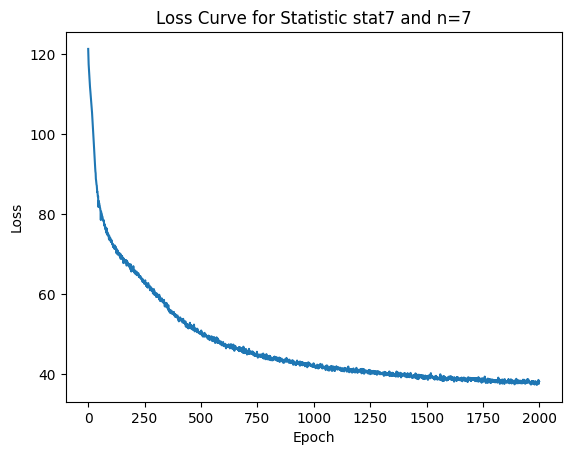

<Figure size 640x480 with 0 Axes>

In [5]:
# Plot loss function
plt.plot(losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Loss Curve for Statistic {label_name} and n={n}")
plt.show()
plt.savefig(f"figures/loss_curve_{n}.png")

# Evaluate the model
Compute the confusion matrix on the train and test dataset and print out the accuracy and plot the confusion matrix.

Accuracy for class 0 = 100.0%
Accuracy for class 1 = 86.66666666666667%
Accuracy for class 2 = 64.06381192275398%
Accuracy for class 3 = 47.682119205298015%
Accuracy for class 4 = 67.50629722921914%
Accuracy for class 5 = 96.66666666666667%
Accuracy for class 6 = 100.0%
Overall accuracy = 58.3531746031746%


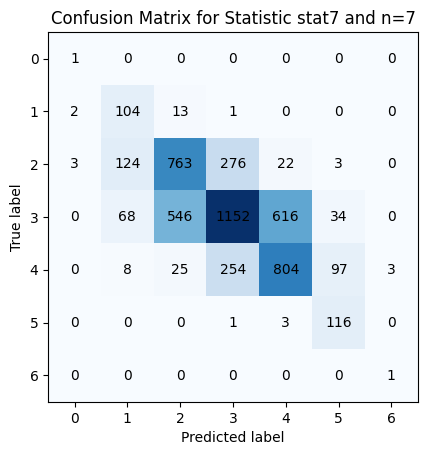

In [6]:
confusion_matrix = evaluate_model(model, full_dataset)
confusion_matrix.print_accuracy()
confusion_matrix.plot(title=f"Confusion Matrix for Statistic {label_name} and n={n}")

# Plot model weights and connections.
Plot the model weights and connections in order to attempt to interpret what the model is learning.

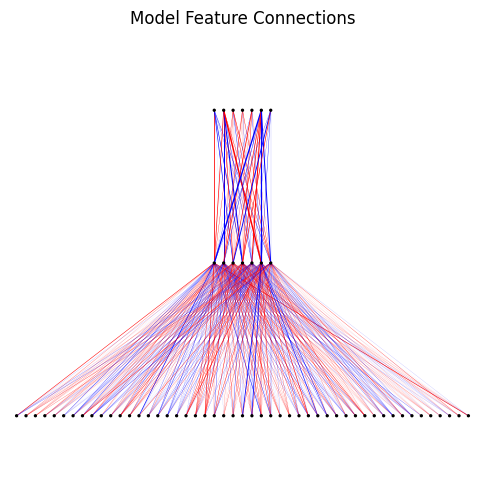

Layer 1


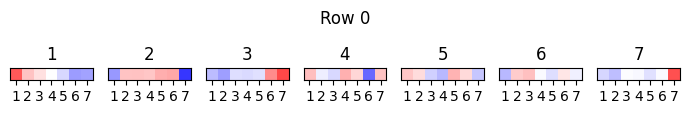

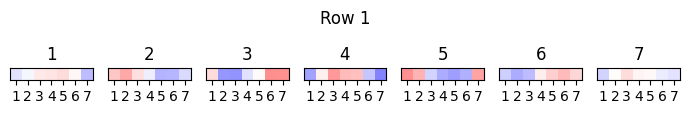

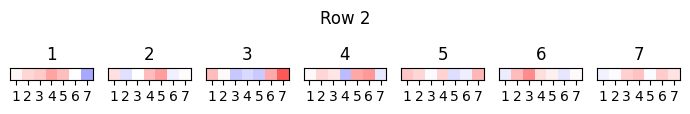

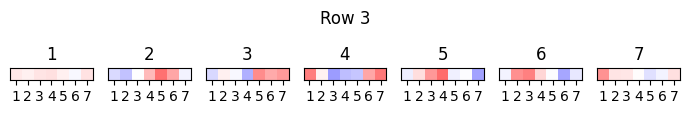

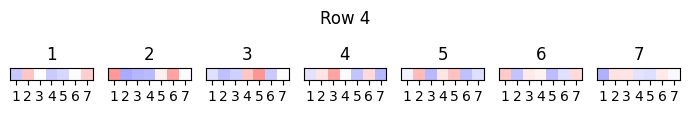

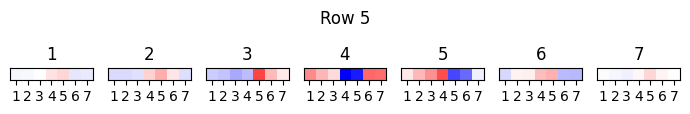

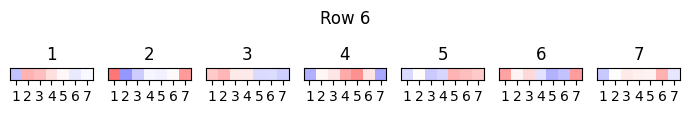

Layer 2


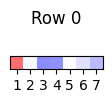

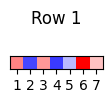

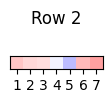

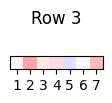

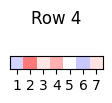

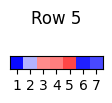

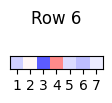

In [7]:
model.plot_connections()

for i in range(len(layers)):
    print(f"Layer {i + 1}")
    for j in range(layers[i]):
        model.plot_heatmap_feature(i, j)